In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#models for scikit learn
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline



#models eval
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,r2_score,mean_absolute_error,mean_squared_error

from sklearn.metrics import plot_roc_curve

file_2020= (r'C:\Users\Dan\Desktop\Garmin\Running 2020.csv')
df_2020= pd.read_csv(file_2020, parse_dates=['Date'])


Bad key "text.kerning_factor" on line 4 in
C:\Users\Dan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df_2020.describe()

,Distance,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Elev Loss,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation,Training Stress Score®,Grit,Flow,Min Temp,Number of Laps,Max Temp
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.0,172.0,172.0,172.0,172.0,172.0,172.000000,172.0
mean,4.938023,158.226744,175.279070,180.558140,195.232558,102.854651,1.200814,0.0,0.0,0.0,0.0,0.0,0.0,5.703488,0.0
std,1.709602,11.223971,10.182718,3.162665,11.906728,42.201367,0.039075,0.0,0.0,0.0,0.0,0.0,0.0,1.756988,0.0
min,0.350000,131.000000,140.000000,173.000000,180.000000,16.000000,1.070000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0
25%,4.000000,151.000000,168.000000,178.000000,188.000000,72.000000,1.180000,0.0,0.0,0.0,0.0,0.0,0.0,5.000000,0.0
50%,5.010000,155.500000,174.000000,181.000000,192.500000,98.000000,1.200000,0.0,0.0,0.0,0.0,0.0,0.0,6.000000,0.0
75%,6.010000,167.000000,184.000000,183.000000,196.000000,128.000000,1.230000,0.0,0.0,0.0,0.0,0.0,0.0,7.000000,0.0
max,12.000000,184.000000,197.000000,190.000000,248.000000,256.000000,1.330000,0.0,0.0,0.0,0.0,0.0,0.0,13.000000,0.0


In [3]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Activity Type             172 non-null    object        
 1   Date                      172 non-null    datetime64[ns]
 2   Favorite                  172 non-null    bool          
 3   Title                     172 non-null    object        
 4   Distance                  172 non-null    float64       
 5   Calories                  172 non-null    object        
 6   Time                      172 non-null    object        
 7   Avg HR                    172 non-null    int64         
 8   Max HR                    172 non-null    int64         
 9   Avg Run Cadence           172 non-null    int64         
 10  Max Run Cadence           172 non-null    int64         
 11  Avg Pace                  172 non-null    object        
 12  Best Pace             

In [4]:
df_2020.isnull().sum()

Activity Type               0
Date                        0
Favorite                    0
Title                       0
Distance                    0
Calories                    0
Time                        0
Avg HR                      0
Max HR                      0
Avg Run Cadence             0
Max Run Cadence             0
Avg Pace                    0
Best Pace                   0
Elev Gain                   0
Elev Loss                   0
Avg Stride Length           0
Avg Vertical Ratio          0
Avg Vertical Oscillation    0
Training Stress Score®      0
Grit                        0
Flow                        0
Climb Time                  0
Bottom Time                 0
Min Temp                    0
Surface Interval            0
Decompression               0
Best Lap Time               0
Number of Laps              0
Max Temp                    0
dtype: int64

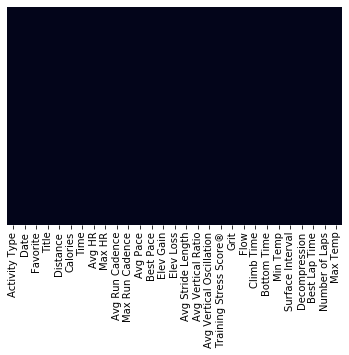

In [5]:
sns.heatmap(df_2020.isnull(),yticklabels=False,cbar=False);

In [6]:
total_milage=df_2020['Distance'].values.sum()
print('total milage:',total_milage)

total milage: 849.3399999999999


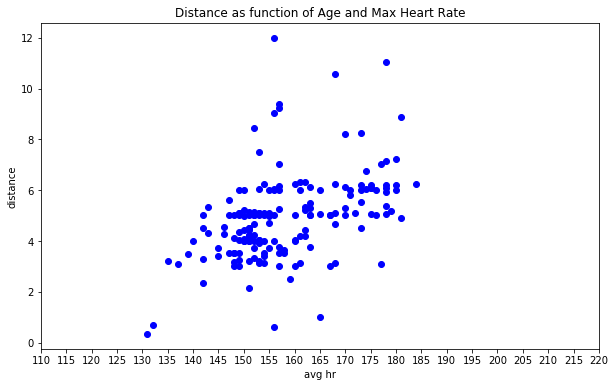

In [7]:

plt.figure(figsize=(10,6))


plt.scatter(df_2020['Avg HR'],
            df_2020['Distance'], 
            c="blue") 



plt.title("Distance as function of Age and Max Heart Rate")
plt.xlabel("avg hr")
plt.xticks(np.arange(110,225,step=5))



plt.ylabel("distance");


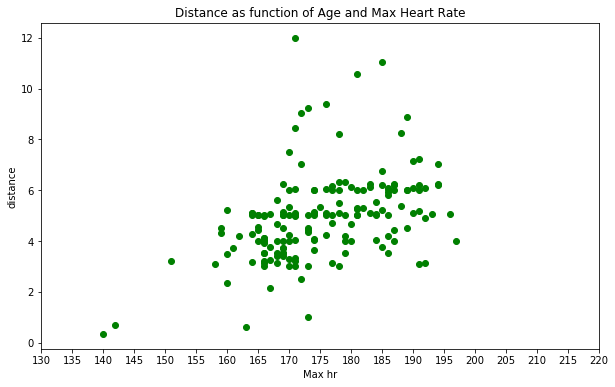

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(df_2020['Max HR'],
            df_2020['Distance'], 
            c="green") 

plt.title("Distance as function of Age and Max Heart Rate")
plt.xlabel("Max hr")
plt.xticks(np.arange(130,225,step=5))



plt.ylabel("distance");

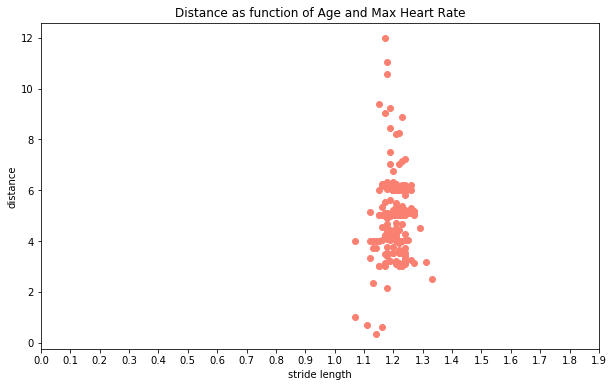

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(df_2020['Avg Stride Length'],
            df_2020['Distance'], 
            c="salmon") 

plt.title("Distance as function of Age and Max Heart Rate")
plt.xlabel("stride length")
plt.xticks(np.arange(0,2,step=.1))



plt.ylabel("distance");

In [10]:
df.Distance.plot.hist(bins=10,color='navy');

NameError: name 'df' is not defined

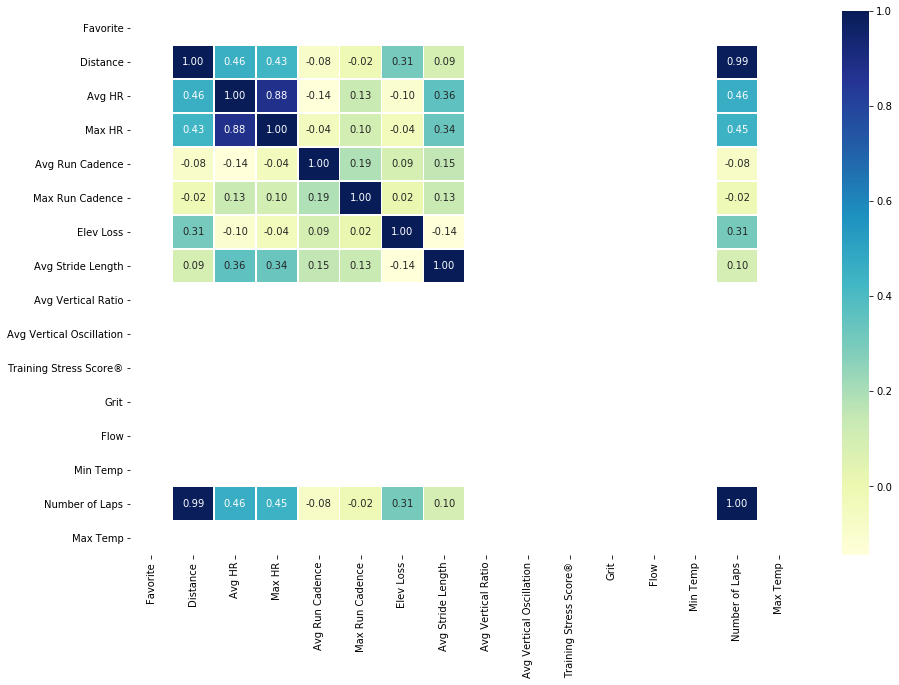

In [11]:
corr_matrix=df_2020.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f',
                cmap='YlGnBu');

In [12]:
df_2020.head()

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,...,Grit,Flow,Climb Time,Bottom Time,Min Temp,Surface Interval,Decompression,Best Lap Time,Number of Laps,Max Temp
0,Running,2020-11-25 17:56:00,False,Boston Running,6.21,726,0:45:21,178,187,179,...,0,0,45:21:00,0:00,0,0:00,No,01:32.1,7,0
1,Running,2020-11-24 14:48:00,False,Boston Running,5.17,593,0:36:17,179,191,180,...,0,0,36:17:00,0:00,0,0:00,No,01:08.0,6,0
2,Running,2020-11-21 15:31:00,False,Boston Running,6.21,697,0:44:44,175,185,180,...,0,0,44:44:00,0:00,0,0:00,No,01:29.4,7,0
3,Running,2020-11-20 17:10:00,False,Boston Running,7.24,867,0:53:02,180,191,177,...,0,0,53:02:00,0:00,0,0:00,No,01:48.9,8,0
4,Running,2020-11-18 17:08:00,False,Boston Running,6.10,743,0:46:00,175,190,179,...,0,0,46:00:00,0:00,0,0:00,No,00:48.2,7,0


In [13]:
df_train=df_2020['Distance'],df_2020['Avg HR'],df_2020['Max HR'],df_2020['Avg Run Cadence'],df_2020['Max Run Cadence'],df_2020['Avg Stride Length']
df_train=pd.DataFrame(df_train)

In [14]:
df_train=df_train.T


In [15]:
#RandomForestRegressor
np.random.seed(11)
#split into dependent and independent variables
X= df_train.drop('Distance',axis=1)
y= df_train['Distance']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
random_forest_model = RandomForestRegressor(n_jobs=-1)
                                                       
# Fit the model
random_forest_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [16]:
random_forest_model.score(X_train,y_train)

0.8788622509876834

In [17]:
y_preds= random_forest_model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

1.3070599999999992

In [18]:
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_test)
    
    scores = {'training data mae': mean_absolute_error(y_train, train_preds),
             'valid mae': mean_absolute_error(y_test,val_preds),
             'train mean squared error': mean_squared_error(y_test,y_preds),
             'training R^2': r2_score(y_train,train_preds),
             'valid R^2': r2_score(y_test,val_preds)}
    return scores

In [19]:
show_scores(random_forest_model)

{'training data mae': 0.40273357664233583,
 'valid mae': 1.3070599999999992,
 'train mean squared error': 3.366986305428568,
 'training R^2': 0.8788622509876834,
 'valid R^2': 0.08945413934773394}

In [20]:
y_test_mean = np.full(len(y_test), y_test.mean())
y_test.mean()

4.996

In [21]:
df= pd.DataFrame(data={'actual values':y_test,
                      'predicted values': y_preds})
df['diff']=df['predicted values']-df['actual values']
df.head()

,actual values,predicted values,diff
97,3.51,3.8909,0.3809
108,4.54,4.5682,0.0282
0,6.21,5.8607,-0.3493
55,3.41,4.9293,1.5193
3,7.24,5.4959,-1.7441


In [22]:
#Ridge model
np.random.seed(11)

X= df_train.drop('Distance',axis=1)
y= df_train['Distance']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
ridge_model = Ridge()
                                                       
# Fit the model
ridge_model.fit(X_train,y_train)
ridge_model.score(X_test,y_test)

0.24893138984164598

In [23]:
show_scores(ridge_model)

{'training data mae': 0.9930635334253607,
 'valid mae': 1.243119797360668,
 'train mean squared error': 3.366986305428568,
 'training R^2': 0.20900832848820683,
 'valid R^2': 0.24893138984164598}

In [24]:
mean_absolute_error(y_test, y_preds)

1.3070599999999992

In [25]:
y_preds= ridge_model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

1.243119797360668

In [27]:
df= pd.DataFrame(data={'actual values':y_test,
                      'predicted values': y_preds})
df['diff']=df['predicted values']-df['actual values']
df.head(10)

,actual values,predicted values,diff
97,3.51,4.480133,0.970133
108,4.54,4.114869,-0.425131
0,6.21,6.232888,0.022888
55,3.41,4.762311,1.352311
3,7.24,5.925491,-1.314509
69,0.60,4.376175,3.776175
94,4.34,4.479313,0.139313
133,3.03,4.417023,1.387023
128,6.03,4.411459,-1.618541
46,3.13,5.321433,2.191433
